In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats
import datetime
%matplotlib inline

# Data
This data is public available at https://www.canada.ca/en/immigration-refugees-citizenship/services/immigrate-canada/express-entry/submit-profile/rounds-invitations.html .

In [6]:
candidateScore = 465
df = pd.read_csv('dataset/ExpressEntry.csv')
df['dayOfInvitation'] = pd.to_datetime(data_ori['dayOfInvitation'])

In [7]:
df

,dayOfInvitation,numberOfInvited,lowestScore
0,2017-11-08,2000,458
1,2017-11-15,2750,439
2,2017-12-06,2750,452
3,2017-12-20,2750,446
4,2018-01-10,2750,446
5,2018-01-24,2750,444
6,2018-02-07,3000,442
7,2018-02-21,3000,442
8,2018-03-14,3000,456
9,2018-03-26,3000,446


# Lowest Score History

Text(0,0.5,'Score')

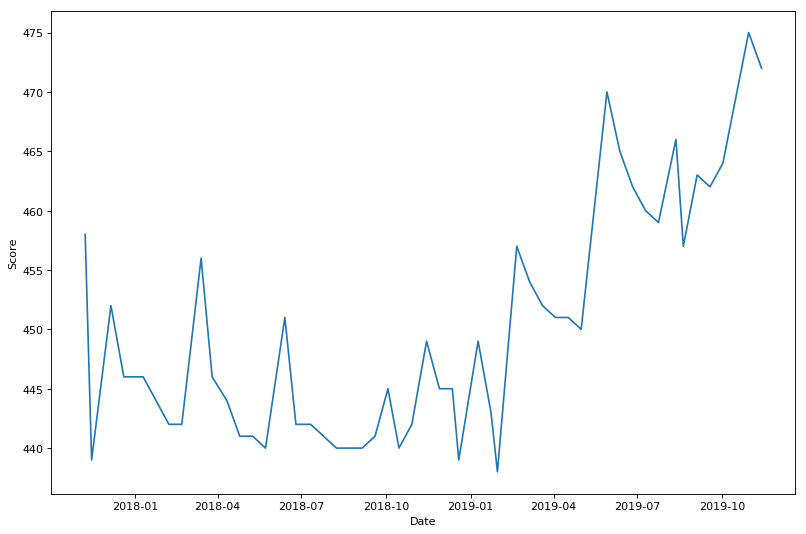

In [4]:
fig=plt.figure(figsize=(12, 8), dpi= 80)
plt.plot(data_ori['dayOfInvitation'], data_ori['lowestScore'] )
plt.xlabel('Date')
plt.ylabel('Score')

There has been a significant change in the lowest scores starting on mid 2019. Since I am using a normal distribution to fit the lowest scores, it is necessary to use only the datapoints starting from May-2019.

In [5]:
data = data_ori.iloc[38:,:]
data.head()

,dayOfInvitation,numberOfInvited,lowestScore
38,2019-05-29,3350,470
39,2019-06-12,3350,465
40,2019-06-26,3350,462
41,2019-07-10,3600,460
42,2019-07-24,3600,459


# Chance of being invited

First, let's check our chances of being invited. To do that, we will assume a normal distribution and check the cumulative probability distribution associated with our score.

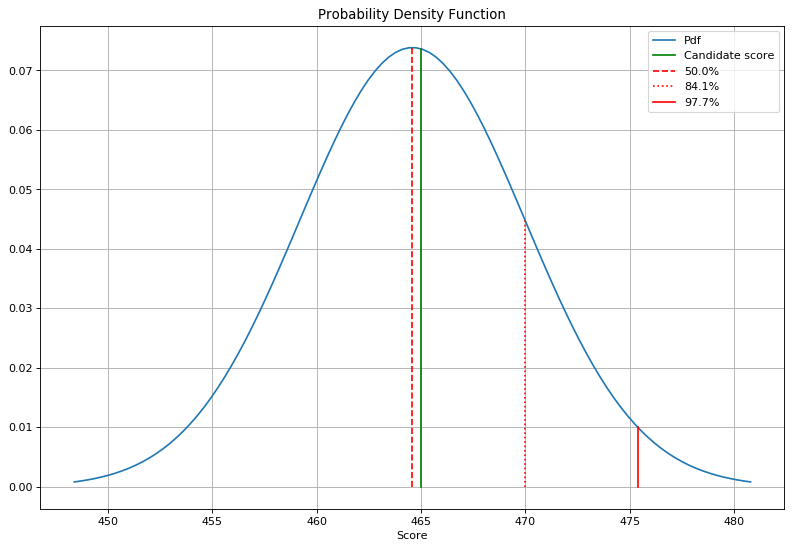

The probability of being invited in the next round is: 53.1%


In [6]:
scrMean = data['lowestScore'].mean()
scrStd = data['lowestScore'].std()

fig=plt.figure(figsize=(12, 8), dpi= 80)
x = np.linspace(scrMean - 3*scrStd, scrMean + 3*scrStd, 100)
plt.plot(x,mlab.normpdf(x, scrMean, scrStd), label='Pdf')
plt.plot([candidateScore,candidateScore],[0,scipy.stats.norm(scrMean, scrStd).pdf(candidateScore)],color='green', label='Candidate score')
plt.plot([scrMean,scrMean],[0,scipy.stats.norm(scrMean, scrStd).pdf(scrMean)],color='red', label='50.0%', linestyle='--')
plt.plot([scrMean+scrStd,scrMean+scrStd],[0,scipy.stats.norm(scrMean, scrStd).pdf(scrMean+scrStd)],color='red', label='84.1%', linestyle=':')
plt.plot([scrMean+2*scrStd,scrMean+2*scrStd],[0,scipy.stats.norm(scrMean, scrStd).pdf(scrMean+2*scrStd)],color='red', label='97.7%')
plt.grid()
plt.legend()
plt.title('Probability Density Function')
plt.xlabel('Score')

plt.show()

invitationProbability = round(scipy.stats.norm(scrMean, scrStd).cdf(candidateScore),3)
print('The probability of being invited in the next round is: {}%'.format(invitationProbability*100))

# Day of next invitation

Now, let's try to predict when the next round of invitations will take place. First, let's check the day of the week of the previous invitations.

In [7]:
data['dayOfWeek'] = data['dayOfInvitation'].dt.weekday_name

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Rounds')

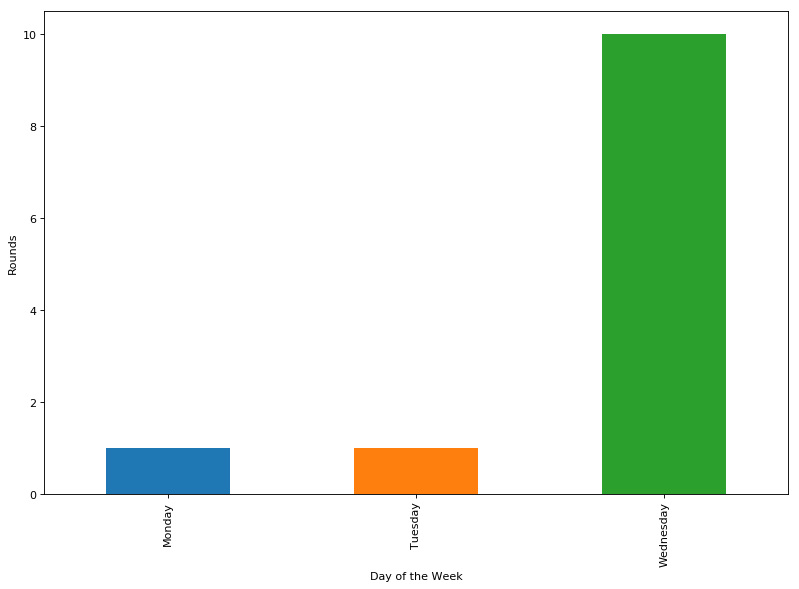

In [8]:
fig=plt.figure(figsize=(12, 8), dpi= 80)
ax = data.groupby(by='dayOfWeek')['dayOfWeek'].count().plot(kind='bar')
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Rounds")

So, we can see that the invitations occur usually on Wednesdays but sometimes on Mondays. The safe bet would be Wednesday.
Now, let's check the mean interval between invitations and add that to the last invitation.

In [9]:
data['dayOfInvitationShifted'] = data['dayOfInvitation'].shift(-1)
meanInterval=(data['dayOfInvitationShifted']-data['dayOfInvitation']).mean()

#Adding this to the last invitation date
nextinvitation = list(data['dayOfInvitation'])[-1]+meanInterval

#weekday = 0 is monday - 6 is sunday
dayofweek = nextinvitation.weekday()

#Let's take the closest wednesday (weekday=2)
nextinvitationday = nextinvitation.day + 2 - dayofweek

#Convert back to date
nextinvitation = datetime.date(nextinvitation.year, nextinvitation.month, nextinvitationday)

print('The next invitation will probably take place on {}.'.format(nextinvitation))

The next invitation will probably take place on 2019-11-27.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# How many candidates will be invited
For this one we will only check the tendency of the last invitations.

Text(0,0.5,'Number of People Invited')

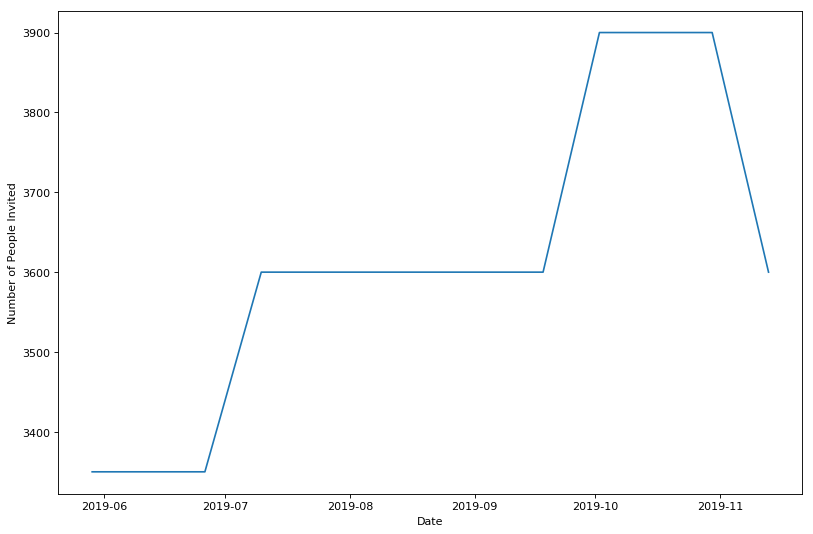

In [10]:
fig=plt.figure(figsize=(12, 8), dpi= 80)
plt.plot(data['dayOfInvitation'], data['numberOfInvited'] )
plt.xlabel('Date')
plt.ylabel('Number of People Invited')

It looks like the number of invitations per round seems to be floating around 3600.

Text(0,0.5,'Rounds')

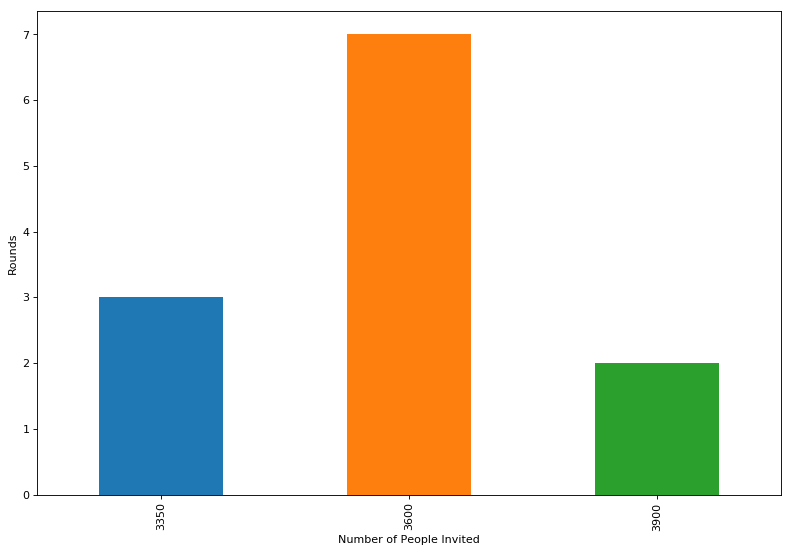

In [11]:
fig=plt.figure(figsize=(12, 8), dpi= 80)
ax = data.groupby(by='numberOfInvited')['numberOfInvited'].count().plot(kind='bar')
ax.set_xlabel("Number of People Invited")
ax.set_ylabel("Rounds")

It seems that CIC is adjusting the number of invitations per round. Maybe this is intended to keep the minimum score at a specific level. Not too high, not too low. Therefore, it is possible that they will invite 3600 people for the next round.

# Conclusion
With a score of 465, the chance of being invited is around 53%.

The next invitation will probably take place on November 27th.

They will probably invite 3600 people.